In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # dividir dados entre treinmaneto e teste
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [33]:
dataset_nubank = pd.read_csv("nubank_2022_2023.csv")
dataset_nasdaq = pd.read_csv("dataset_input/Nasdaq-100_2023_2023.csv")

In [34]:
dataset_nubank = dataset_nubank.drop(["Date","Change %","Vol."], axis=1)
dataset_nasdaq = dataset_nasdaq.drop(["Date","Change %","Vol."], axis=1)

In [35]:
for i in dataset_nasdaq:
    dataset_nasdaq[i] = dataset_nasdaq[i].str.replace(',', '').astype(float)

In [36]:
scaler = MinMaxScaler()
features = ['Price', 'Open', 'High']
# Normalize the selected columns
dataset_nasdaq[features] = scaler.fit_transform(dataset_nasdaq[features])
dataset_nubank[['Price']] = scaler.fit_transform(dataset_nubank[['Price']])


In [37]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy='mean')
dataset_nubank = pd.DataFrame(my_imputer.fit_transform(dataset_nubank), columns=['Price','Open', "High", "Low"])
dataset_nasdaq = pd.DataFrame(my_imputer.transform(dataset_nasdaq), columns=['Price','Open', "High", "Low"])

In [38]:

X = dataset_nasdaq[features]

In [39]:
y = dataset_nubank['Price']


In [40]:
X_train_nasdaq, X_test_nasdaq, y_train_nubank, y_test_nubank = train_test_split(X, y, test_size=0.3)

In [86]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(40, input_dim = X.shape[1], activation = "relu"))
model.add(keras.layers.Dense(40, activation = "relu"))
model.add(keras.layers.Dense(40, activation = "relu"))
model.add(keras.layers.Dense(1))


In [87]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics=['mean_absolute_error']
    
)

In [ ]:
model.fit(
 X_train_nasdaq,
 y_train_nubank,
 epochs = 100
)

In [ ]:
print("The predictions are")
y_predicted = model.predict(X_test_nasdaq)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE")
mae = mean_absolute_error(y_test_nubank, y_predicted)
print("Value:",mae)

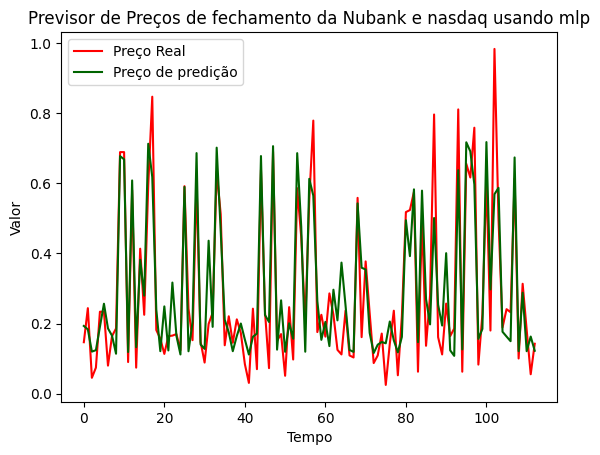

In [85]:
plt.plot(pd.array(y_test_nubank), color = 'red',label = 'Preço Real')
plt.plot(y_predicted, color = 'darkgreen', label="Preço de predição")
plt.title('Previsor de Preços de fechamento da Nubank e nasdaq usando mlp')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()